In [1]:
%matplotlib inline
import pylab as plt
import numpy as np

In [2]:
# Load up the spiking data - this is just 1 digital input (40 trials, 30 neurons, 7000ms of data)
spikes = np.load("spikes.npy")
spikes.shape

(40, 30, 7000)

In [3]:
# First average the spiking array across trials - this is the approach we follow in blech_make_psth.py
trial_averaged_spikes = np.mean(spikes, axis=0)
trial_averaged_spikes.shape

(30, 7000)

Text(0, 0.5, 'Weight of time point when averaging spikes in the window')

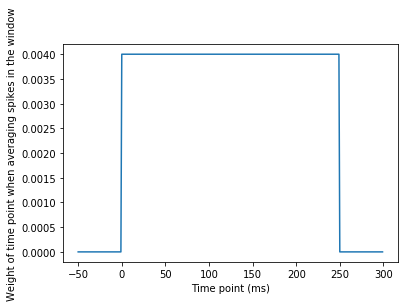

In [7]:
# Our usual PSTH, with a discrete step-function window (250ms long)
window = np.zeros(350)
window[50:300] = np.ones(250)
plt.plot(np.arange(350) - 50, window/np.sum(window))
plt.xlabel("Time point (ms)")
plt.ylabel("Weight of time point when averaging spikes in the window")

From every time point of consideration, we look at 250ms extending out into the future. Each time point has the same weight (1/250) - we multiply each spike in that 250ms window by that weight and sum them up. This is exactly the average number of spikes in the 250ms window!

In [9]:
# Implement our usual PSTH with a convolution
# Read docstring of np.convolve
# mode = "valid" only calculates the convolution if the 250ms window overlaps completely with the spike train
psth = []
# Run over the 30 neurons, get PSTH for each neuron
for i in range(30):
    psth.append(np.convolve(trial_averaged_spikes[i, :], window[50:300]/np.sum(window[50:300]), mode = "valid"))
psth = np.array(psth)
psth.shape

(30, 6751)

Text(0, 0.5, 'Firing rate (Hz)')

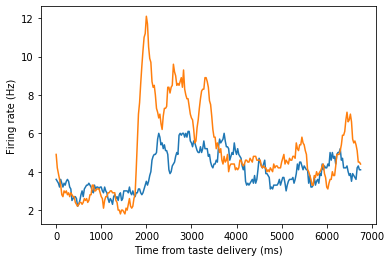

In [16]:
# In our usual way of doing PSTHs, we move windows by 25ms. 
# So here we can only look at every 25th value in the convolution
# A couple of PSTHs
plt.plot(np.arange(0, 6751, 25), 1000*psth[0, ::25])
plt.xlabel("Time from taste delivery (ms)")
plt.ylabel("Firing rate (Hz)")

Text(0, 0.5, 'Firing rate (Hz)')

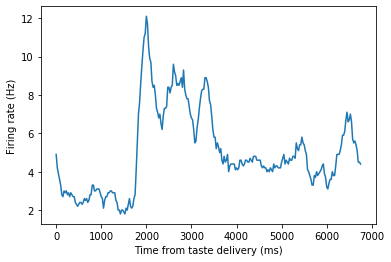

In [17]:
plt.plot(np.arange(0, 6751, 25), 1000*psth[24, ::25])
plt.xlabel("Time from taste delivery (ms)")
plt.ylabel("Firing rate (Hz)")

Now, we will do the same using a half Gaussian window - what do I mean by that?

In [18]:
from scipy.signal import gaussian

Text(0, 0.5, 'Weight of time point when averaging spikes in the window')

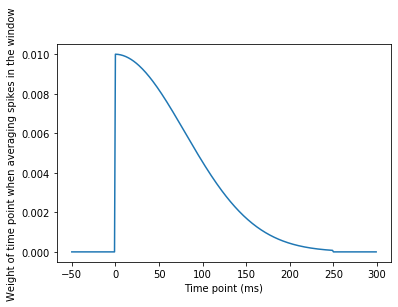

In [21]:
# We make a Gaussian window of 500ms length, with 80ms as SD
# Then its half window will be 250ms long, and 3*SD = 240ms will cover 99% of the weight under the window (exactly 
# what we want)
window = np.zeros(350)
window[50:300] = gaussian(500, std = 80)[250:]
plt.plot(np.arange(350) - 50, window/np.sum(window[50:300]))
plt.xlabel("Time point (ms)")
plt.ylabel("Weight of time point when averaging spikes in the window")

Compare this window function to the one above - here we give high weight to the time points that are very close to the start of the window (time 0), but almost no weight 250ms away. **Again, exactly what we want!**

In [22]:
# Now lets make the PSTH with this kind of window
psth = []
# Run over the 30 neurons, get PSTH for each neuron
for i in range(30):
    psth.append(np.convolve(trial_averaged_spikes[i, :], window[50:300]/np.sum(window[50:300]), mode = "valid"))
psth = np.array(psth)
psth.shape

(30, 6751)

Text(0, 0.5, 'Firing rate (Hz)')

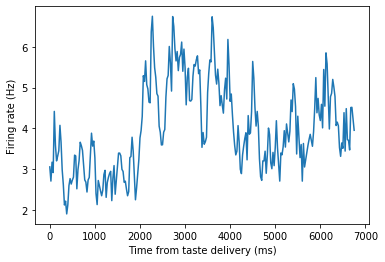

In [23]:
# Again we can only look at every 25th value in the convolution
# A couple of PSTHs
plt.plot(np.arange(0, 6751, 25), 1000*psth[0, ::25])
plt.xlabel("Time from taste delivery (ms)")
plt.ylabel("Firing rate (Hz)")

Text(0, 0.5, 'Firing rate (Hz)')

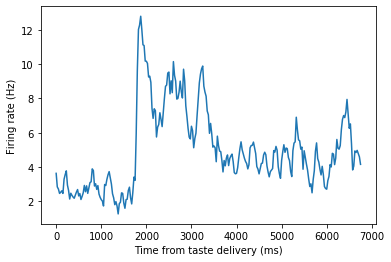

In [24]:
plt.plot(np.arange(0, 6751, 25), 1000*psth[24, ::25])
plt.xlabel("Time from taste delivery (ms)")
plt.ylabel("Firing rate (Hz)")

By this method, we can see that the jump in firing rate only happens right at/after taste delivery (there isn't any leakage), but the PSTHs look "jumpier" than they do with the discrete window. Just different ways of averaging!